<a href="https://colab.research.google.com/github/sceddd/CRA/blob/main/track_and_detect_with_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yolov8 in count object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()

!pip install ultralytics 
!pip install roboflow --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


##download video

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-05-20 09:28:55--  https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-
Resolving docs.google.com (docs.google.com)... 173.194.195.100, 173.194.195.113, 173.194.195.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.195.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dsq1is9ph0kdm1s4tlfrg5lrsrfvsnub/1684574925000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=e61a6e52-5a4b-4623-a6d8-604c761f72b5 [following]
--2023-05-20 09:28:57--  https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dsq1is9ph0kdm1s4tlfrg5lrsrfvsnub/1684574925000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=e61a6e52-5a4b-4623-a6d8-604c761f72b5
Resolving doc-0s-ag-docs.googleusercontent.com (doc-0s-ag-docs.googleusercontent.com)... 142.

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack
!pip install -q -r requirements.txt
!pip install thop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112
!pip install -q loguru lap

/content
Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 25.17 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.
Updating files: 100% (229/229), done.
/content/ByteTrack
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ...

In [ ]:
import sys
sys.path.append(f"{HOME}/ByteTrack")
import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from IPython.display import clear_output
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [ ]:
!pip install supervision==0.7.0
!pip install lap>=0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Add roboflow dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key='wJB8Y6GudjCCjIw5qXLf')
project = rf.workspace('sceddd').project("vehicle-model-hb3ou")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.98, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to vehicle-model-1 in yolov8:: 100%|██████████| 84/84 [00:00<00:00, 1058.85it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs = 15 imgsz = 225

/content
100% 21.5M/21.5M [00:00<00:00, 74.8MB/s]
Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ByteTrack/vehicle-model-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=225, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
!ls {HOME}/runs/detect/train

ls: cannot access '/content/runs/detect/train': No such file or directory


In [ ]:
from PIL import Image

def displayImage(filepath):
  img = Image.open(filepath)
  img.show()

In [ ]:
%cd {HOME}
displayImage(f"{HOME}/runs/detect/train/confusion_matrix.png")

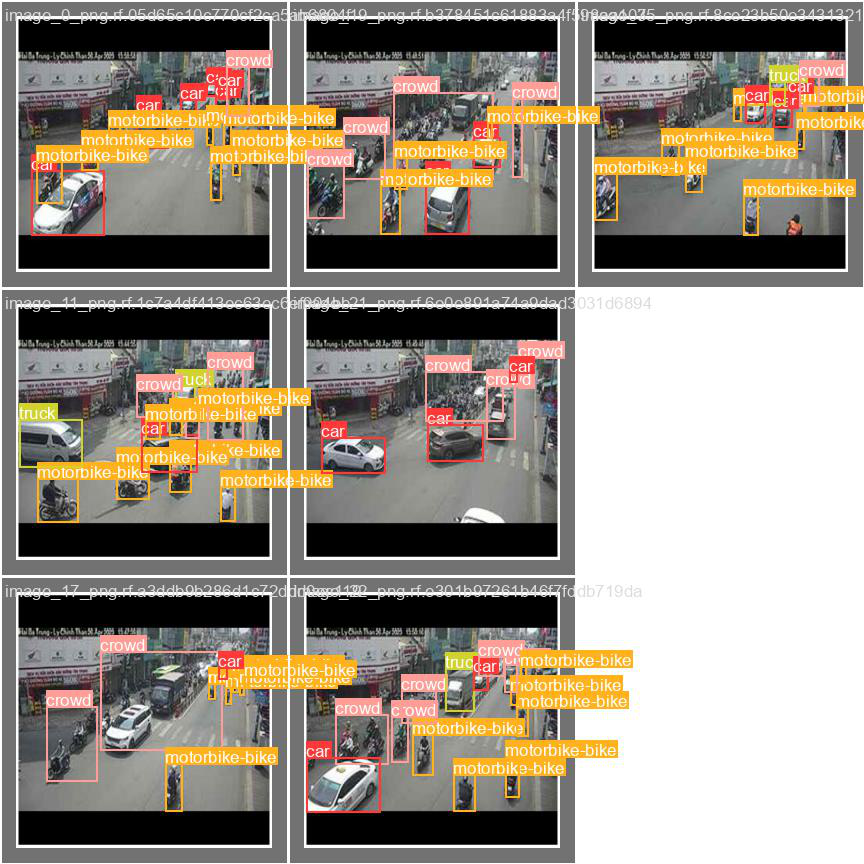

In [ ]:
displayImage('/content/runs/detect/train8/val_batch0_labels.jpg')

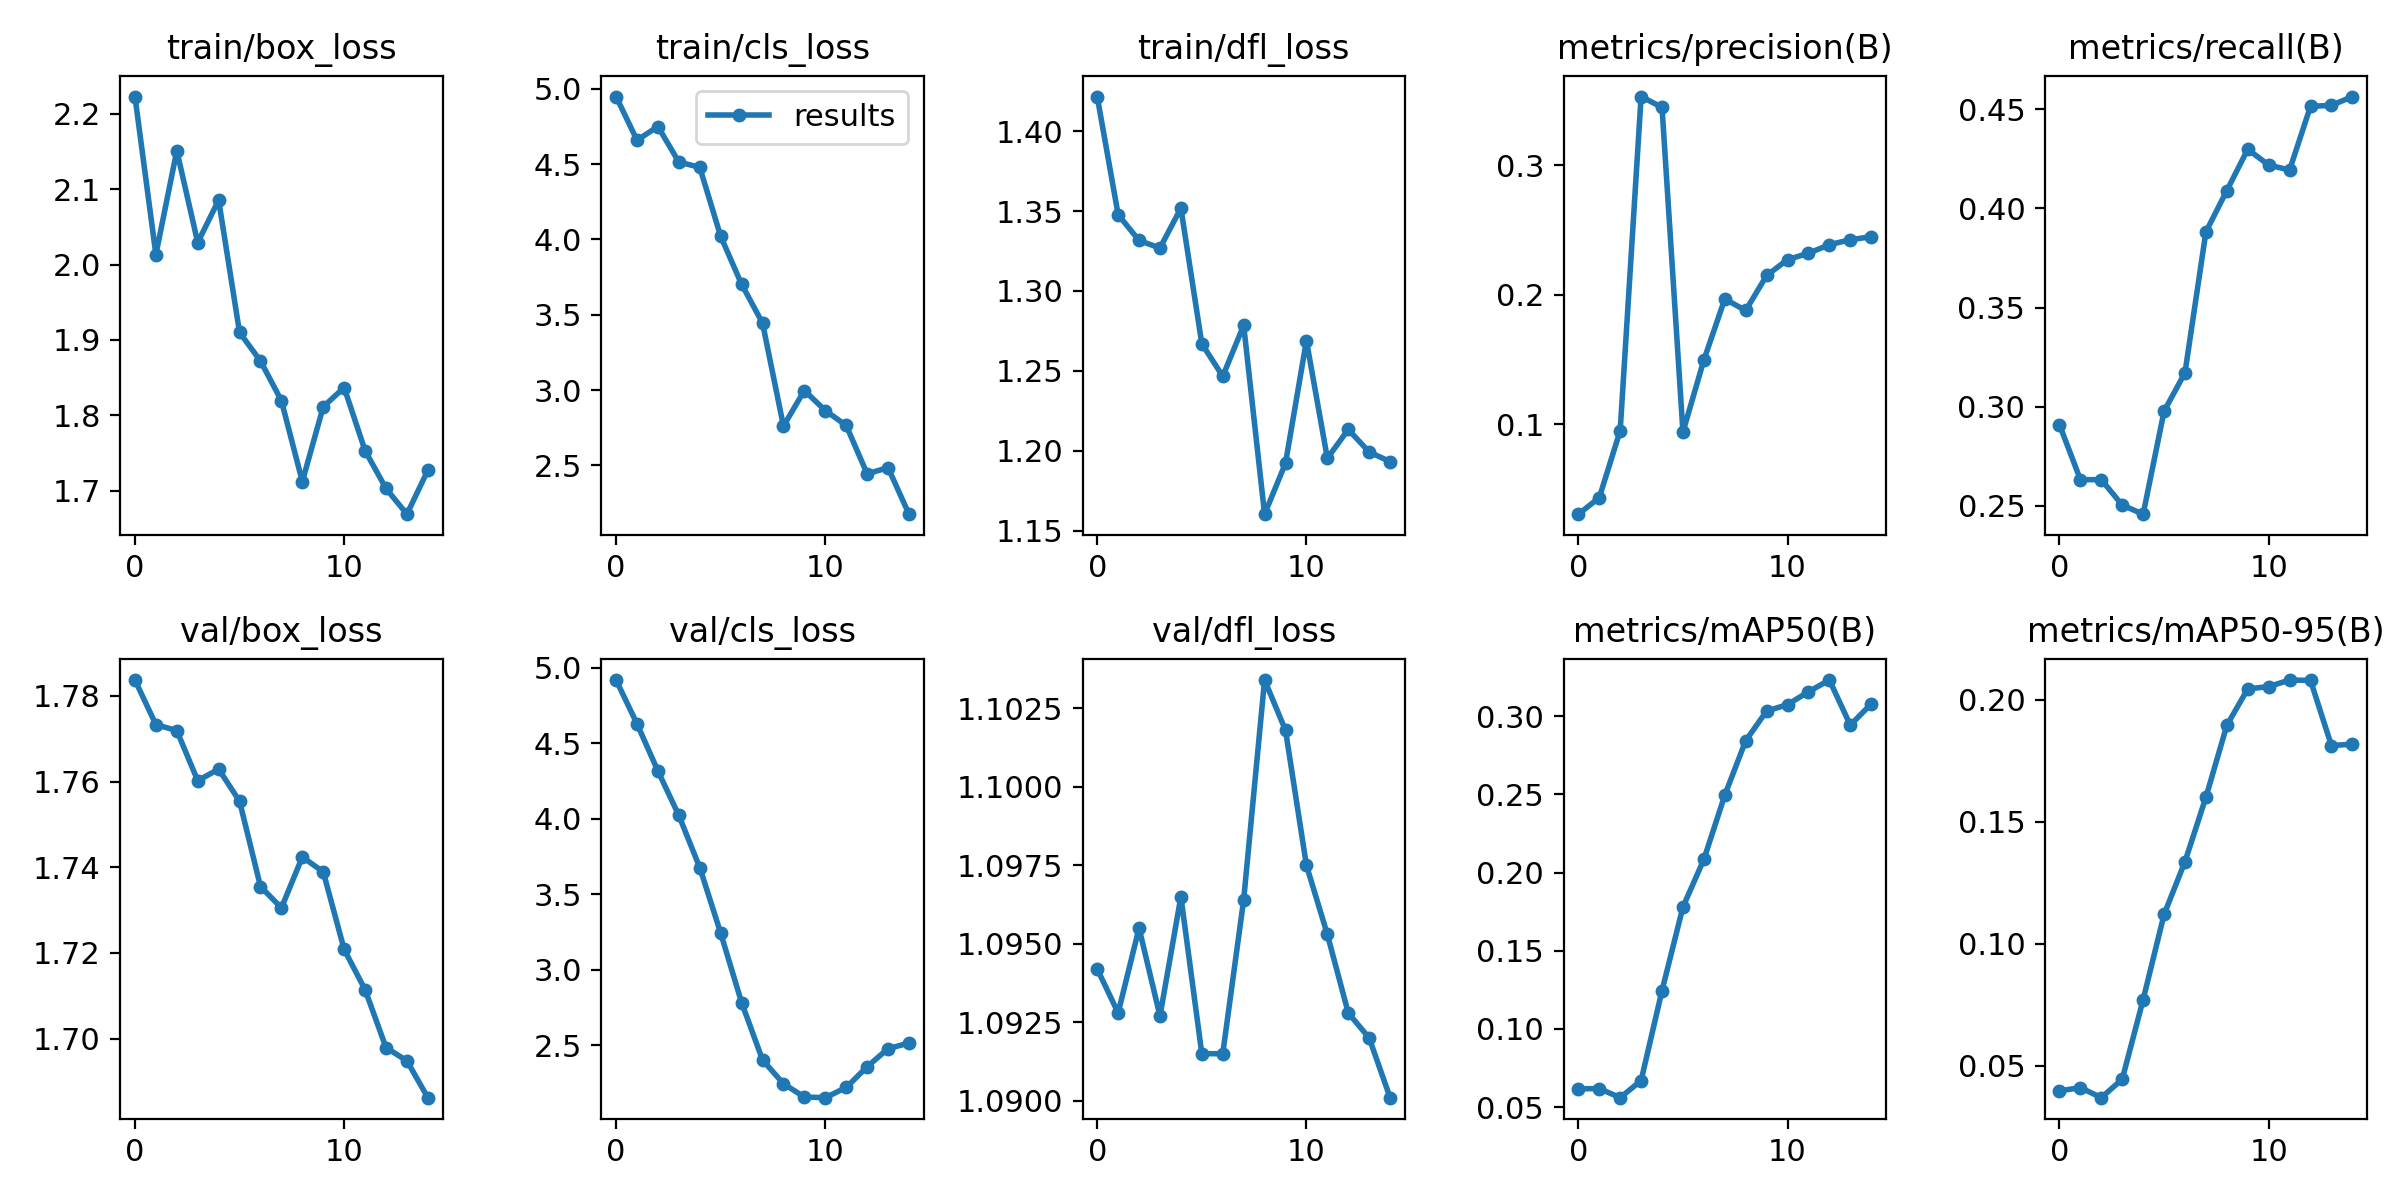

In [ ]:
displayImage('/content/runs/detect/train/results.png')

#Detect object by yolov8

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
clear_output()
import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.7.0


In [ ]:
# settings
from ultralytics import YOLO
MODEL = "yolov8n.pt"
model = YOLO(MODEL)
model.fuse()
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

In [ ]:
CLASS_ID = [1, 2, 3, 5, 7]
for i in CLASS_ID:
  print(CLASS_NAMES_DICT[i])

bicycle
car
motorcycle
bus
truck


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.core import Point
from supervision.video import VideoInfo,VideoSink,get_video_frames_generator
from supervision.notebook.utils import plot_image
from supervision.detection.core import Detections
from supervision.detection.annotate import BoxAnnotator
from supervision.detection.line_counter import LineZone, LineZoneAnnotator
from tqdm.notebook import tqdm
from supervision import process_video
import numpy as np

In [ ]:
from typing import List

import numpy as np

# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

##Create line counter for counting object

In [ ]:
SOURCE_VIDEO_PATH = f"/content/drive/MyDrive/Camera-Giao-Thong/14 05 2023/camera1.mp4"
OUTPUT_VIDEO_PATH = f"/content/drive/MyDrive/Camera-Giao-Thong/output/vehicle-counting-result1.mp4"

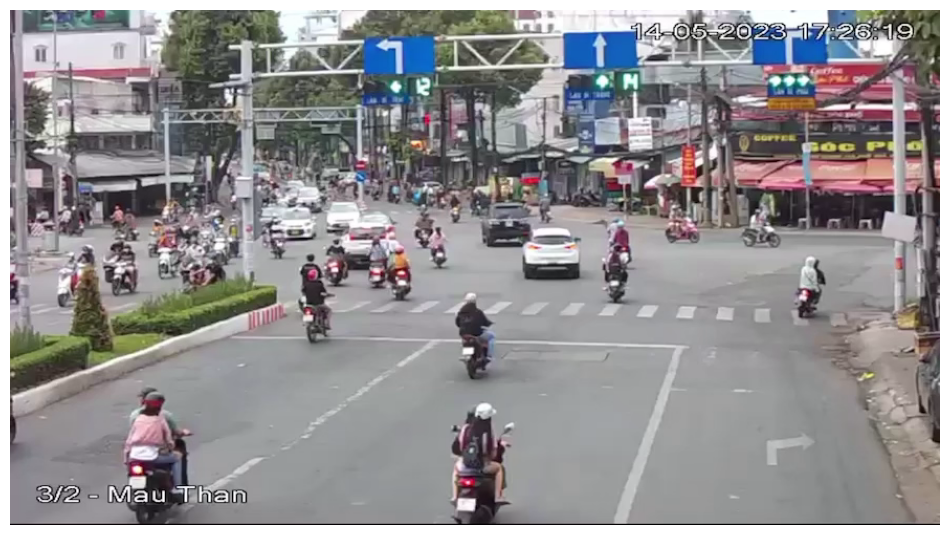

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
iterator = iter(generator)
frame = next(iterator)
plot_image(frame)

#Detect and count object

##Create lines object for detect multiple lines

In [ ]:
#position of line TODO: detect road surface marking to draw line
LINES = [[Point(220, 310),Point(850, 310)],[Point(860,310),Point(795,190)],[Point(550,179),Point(180,180)]]


In [ ]:
color = ColorPalette.default()
lines = [
    LineZone(start=x,end=y)
    for x,y
    in LINES
]
lines_annotator = [
    LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=2)
    for index in range(len(lines))
]
box_annotator = BoxAnnotator(thickness = 1, text_thickness = 2,text_scale=2)
byte_tracker = BYTETracker(BYTETrackerArgs())

In [ ]:
def process_frame(frame: np.ndarray, i) -> np.ndarray:
    # detect
    results = model(frame)[0]
    detections = Detections.from_yolov8(results)
    # annotate and display frame
    mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
    detections = detections[mask]
    # tracking detections
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
    detections.tracker_id = np.array(tracker_id)
    # filtering out detections without trackers
    mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
    detections = detections[mask]
    for line,line_annotator in zip(lines,lines_annotator):
      # settings
      frame = box_annotator.annotate(scene=frame,detections=detections)
      line.trigger(detections = detections)
      frame = line_annotator.annotate(frame=frame,line_counter=line)
    return frame

In [ ]:
process_frame(frame,1)

In [84]:
process_video(source_path=SOURCE_VIDEO_PATH, target_path=f"{HOME}/subway-result.mp4", callback=process_frame)

Streaming output truncated to the last 5000 lines.
Speed: 3.3ms preprocess, 295.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 persons, 5 cars, 13 motorcycles, 223.1ms
Speed: 6.3ms preprocess, 223.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 14 persons, 4 cars, 14 motorcycles, 234.2ms
Speed: 4.9ms preprocess, 234.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 15 persons, 4 cars, 14 motorcycles, 223.9ms
Speed: 3.2ms preprocess, 223.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 6 cars, 16 motorcycles, 226.3ms
Speed: 3.2ms preprocess, 226.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 6 cars, 16 motorcycles, 217.2ms
Speed: 6.5ms preprocess, 217.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 13 persons, 6 cars, 16 motorcycles, 233.4ms
Speed: 6.6ms preprocess, 

KeyboardInterrupt: ignored